<a href="https://colab.research.google.com/github/ssilb4/colab/blob/jeju/jeju_datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/ssilb4/gitflow/master/data/output_datalab.csv?token=AEXPY5HNMUZK6JR77K3SPD27D6FHC')

HTTPError: ignored

In [ ]:
df['위치'].unique()

In [ ]:
import matplotlib.pyplot as plt

df_seoul = df[df['위치']=='서울특별시']
df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")


In [ ]:
import numpy as np

In [ ]:
work_types=['eatery','fbeauty','hobbyenter','leisure','living','tour']

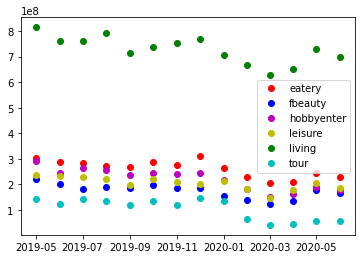

In [34]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_seoul = df[(df['위치']=='서울특별시') & (df['업종']==work_type)]
  df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")
  plt.plot(df_seoul.index,df_seoul['매출'],colors[index], label=work_types[index])
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

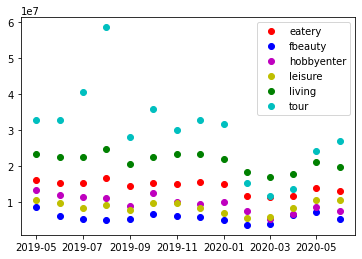

In [16]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_jeju = df[(df['위치']=='제주특별자치도') & (df['업종']==work_type)]
  df_jeju.index = pd.to_datetime(df_jeju["날짜"],format="%Y%m%d")
  plt.plot(df_jeju.index,df_jeju['매출'],colors[index], label=work_type)
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [68]:
df_group = df.groupby(['위치','날짜'],as_index=False).agg({
    '매출':sum})

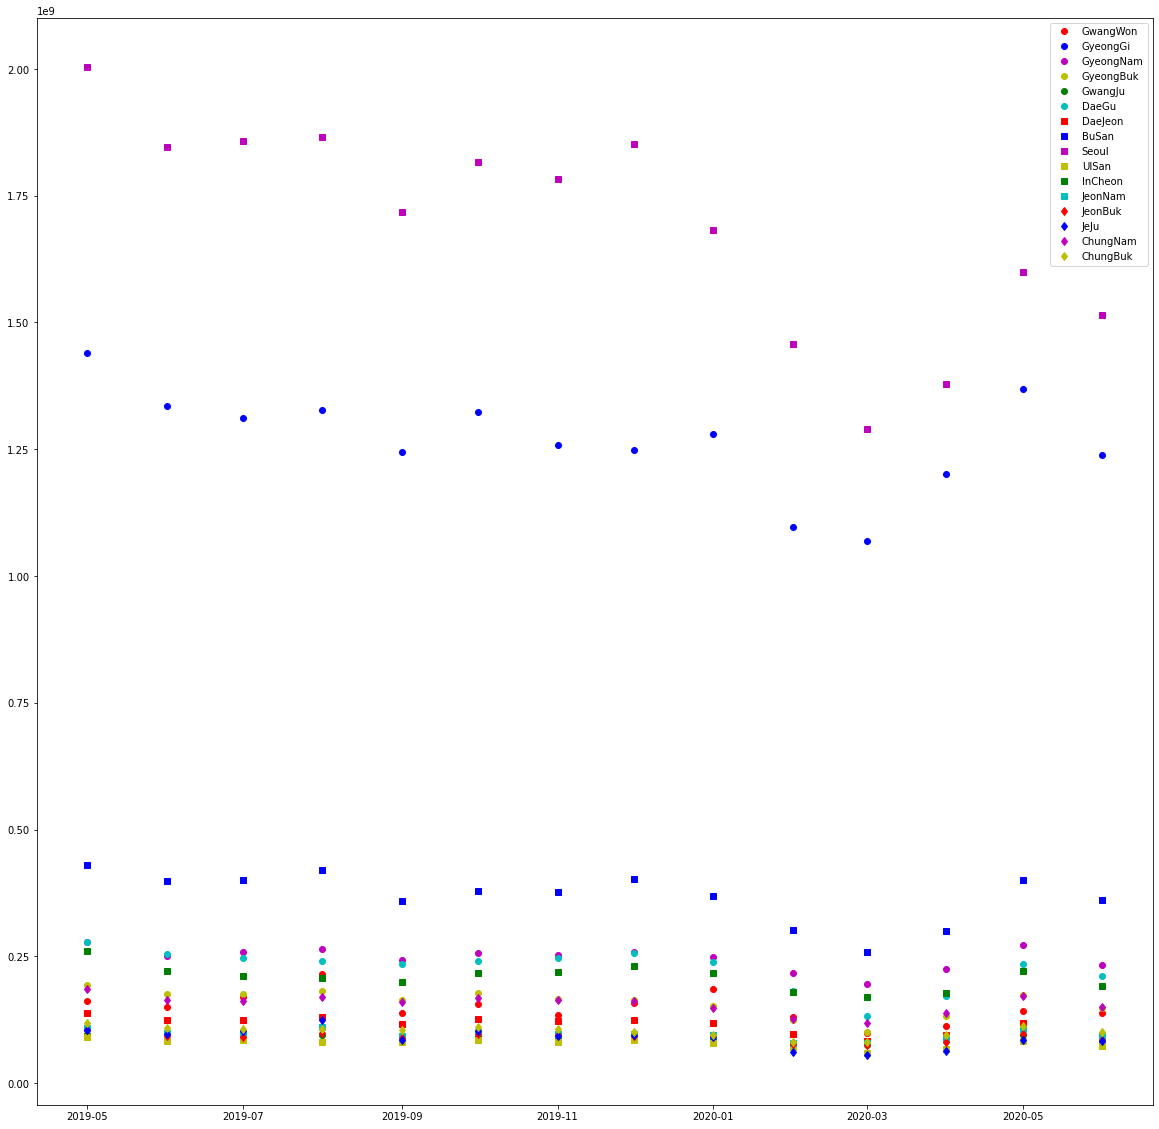

In [18]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']
plt.figure(figsize=(20,20))
for location in df_group['위치'].drop_duplicates():
  df_gorup2 = df_group[df_group['위치']==location]
  df_gorup2.index = pd.to_datetime(df_gorup2["날짜"],format="%Y%m%d")
  plt.plot(df_gorup2.index,df_gorup2['매출'], colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [22]:
df_group

,위치,날짜,매출
0,강원도,20190501,161927748
1,강원도,20190601,151123928
2,강원도,20190701,169376521
3,강원도,20190801,215660537
4,강원도,20190901,138718796
...,...,...,...
219,충청북도,20200201,82016676
220,충청북도,20200301,82122100
221,충청북도,20200401,95334733
222,충청북도,20200501,113669886


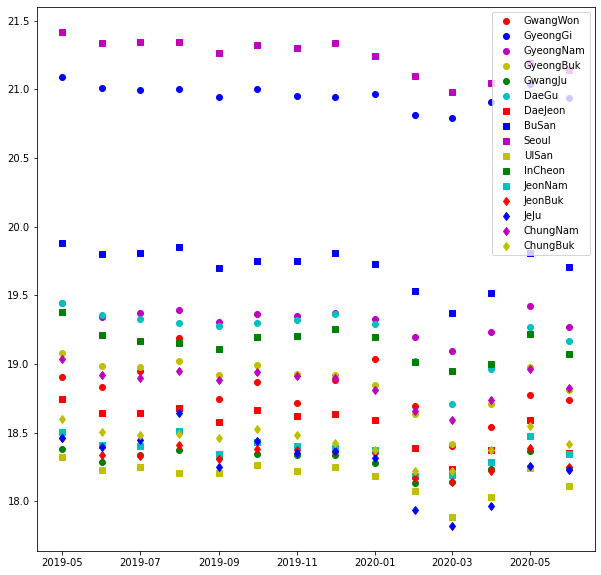

In [23]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']
plt.figure(figsize=(10,10))
for location in df_group['위치'].drop_duplicates():
  df_gorup2 = df_group[df_group['위치']==location]
  df_gorup2.index = pd.to_datetime(df_gorup2["날짜"],format="%Y%m%d")
  train_target = np.log1p(df_gorup2['매출'])
  plt.plot(df_gorup2.index,train_target, colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [26]:
df_merge = pd.read_csv('https://raw.githubusercontent.com/ssilb4/gitflow/master/data/output_koreabank_datalab.csv?token=AEXPY5FKFKS33AOXH3YMWVC7D6ZD6')

In [27]:
df_merge

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT,STD_CLSS_NM2,STD_CLSS_NM3
0,201901,강원,건강보조식품 소매업,148354746,건강보조식품,eatery
1,201901,강원,골프장 운영업,1229200312,스포츠/오락/여가,leisure
2,201901,강원,과실 및 채소 소매업,1286979106,식료품,eatery
3,201901,강원,관광 민예품 및 선물용품 소매업,30656770,여행/교통,tour
4,201901,강원,그외 기타 스포츠시설 운영업,13101500,스포츠/오락/여가,leisure
...,...,...,...,...,...,...
9433,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1315245299,숙박/음식,eatery
9434,202003,충북,한식 음식점업,16152482704,숙박/음식,eatery
9435,202003,충북,호텔업,15248550,숙박/음식,tour
9436,202003,충북,화장품 및 방향제 소매업,428881434,화장품,fbeauty


In [38]:
df_merge_group = df_merge.groupby(['REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM3'],as_index=False).sum()

In [39]:
df_merge_group[df_merge_group['CARD_SIDO_NM']=='제주']

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM3,AMT
84,201901,제주,eatery,38388934219
85,201901,제주,fbeauty,673958785
86,201901,제주,hobbyenter,328629915
87,201901,제주,leisure,3003575455
88,201901,제주,living,34276557970
...,...,...,...,...
1513,202003,제주,fbeauty,467288060
1514,202003,제주,hobbyenter,55614730
1515,202003,제주,leisure,2982397499
1516,202003,제주,living,32898952053


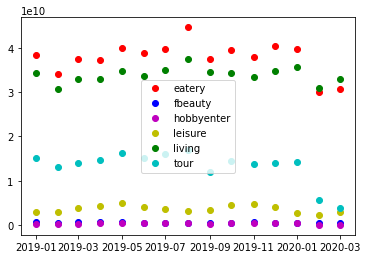

In [40]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df_merge_group['STD_CLSS_NM3'].drop_duplicates():
  df_merge2 = df_merge_group[(df_merge_group['CARD_SIDO_NM']=='제주') & (df_merge_group['STD_CLSS_NM3']==work_type)]
  df_merge2.index = pd.to_datetime(df_merge2["REG_YYMM"],format="%Y%m")
  plt.plot(df_merge2.index,df_merge2['AMT'],colors[index], label=work_type)
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [51]:
df_merge_group2['CARD_SIDO_NM'].drop_duplicates()

0      강원
15     경기
30     경남
45     경북
60     광주
75     대구
90     대전
105    부산
120    서울
135    세종
150    울산
165    인천
180    전남
195    전북
210    제주
225    충남
240    충북
Name: CARD_SIDO_NM, dtype: object

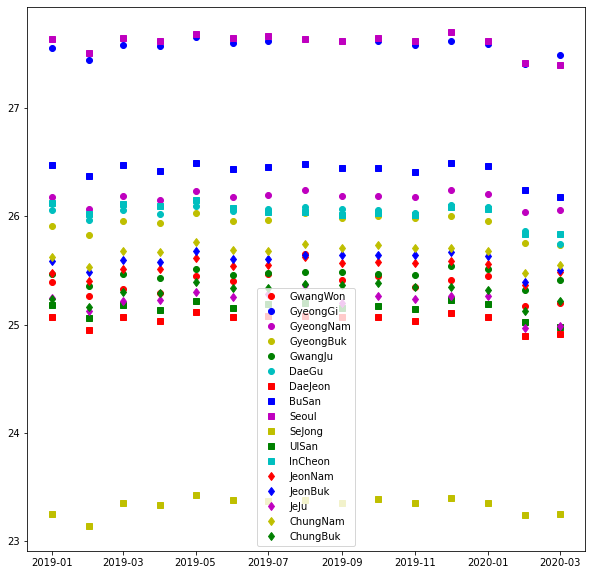

In [53]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'SeJong', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']

df_merge_group2 = df_merge.groupby(['CARD_SIDO_NM','REG_YYMM'],as_index=False).agg({
    'AMT':sum})

plt.figure(figsize=(10,10))
for location in df_merge_group2['CARD_SIDO_NM'].drop_duplicates():
  df_merge2 = df_merge_group2[df_merge_group2['CARD_SIDO_NM']==location]
  df_merge2.index = pd.to_datetime(df_merge2["REG_YYMM"],format="%Y%m")
  train_target = np.log1p(df_merge2['AMT'])
  plt.plot(df_merge2.index,train_target, colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [54]:
df_merge_group2

,CARD_SIDO_NM,REG_YYMM,AMT
0,강원,201901,106565971761
1,강원,201902,93631291707
2,강원,201903,100109898251
3,강원,201904,96789517029
4,강원,201905,113060688933
...,...,...,...
250,충북,201911,101781830737
251,충북,201912,101589774373
252,충북,202001,98809086174
253,충북,202002,81655095617


In [80]:
df_group_t = df_group.copy()
df_group_t['날짜'] = df_group['날짜'].apply(lambda x: int(x/100))
df_group_t['위치'] = df_group['위치'].apply(lambda x: x[0] + x[2] if (('북' in x) or ('남' in x))  else x[0:2])

In [81]:
df_group_t

,위치,날짜,매출
0,강원,201905,161927748
1,강원,201906,151123928
2,강원,201907,169376521
3,강원,201908,215660537
4,강원,201909,138718796
...,...,...,...
219,충북,202002,82016676
220,충북,202003,82122100
221,충북,202004,95334733
222,충북,202005,113669886


In [83]:
df_merge_group2
df_group_t

,위치,날짜,매출
0,강원,201905,161927748
1,강원,201906,151123928
2,강원,201907,169376521
3,강원,201908,215660537
4,강원,201909,138718796
...,...,...,...
219,충북,202002,82016676
220,충북,202003,82122100
221,충북,202004,95334733
222,충북,202005,113669886


In [88]:
df_merge_t = df_group_t.merge(df_merge_group2,left_on=['위치','날짜'],right_on=['CARD_SIDO_NM','REG_YYMM'])

In [89]:
df_merge_t

,위치,날짜,매출,CARD_SIDO_NM,REG_YYMM,AMT
0,강원,201905,161927748,강원,201905,113060688933
1,강원,201906,151123928,강원,201906,108040224807
2,강원,201907,169376521,강원,201907,114448703434
3,강원,201908,215660537,강원,201908,138571658501
4,강원,201909,138718796,강원,201909,108344919044
...,...,...,...,...,...,...
171,충북,201911,106145231,충북,201911,101781830737
172,충북,201912,100486370,충북,201912,101589774373
173,충북,202001,95482300,충북,202001,98809086174
174,충북,202002,82016676,충북,202002,81655095617


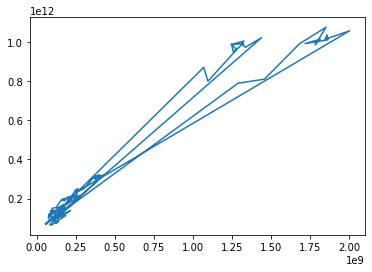

In [91]:
plt.plot(df_merge_t['매출'],df_merge_t['AMT'])

In [92]:
df_merge_t.corr()

,날짜,매출,REG_YYMM,AMT
날짜,1.000000,-0.060750,1.000000,-0.055292
매출,-0.060750,1.000000,-0.060750,0.981037
REG_YYMM,1.000000,-0.060750,1.000000,-0.055292
AMT,-0.055292,0.981037,-0.055292,1.000000


In [101]:
seoul = df_merge_t[df_merge_t['위치']=='서울']
print((seoul['AMT']/seoul['매출']).mean())

df_merge_t[df_merge_t['위치']=='서울']

564.1612656121159


,위치,날짜,매출,CARD_SIDO_NM,REG_YYMM,AMT
88,서울,201905,2003754297,서울,201905,1057879226251
89,서울,201906,1846608299,서울,201906,1014410284692
90,서울,201907,1858854436,서울,201907,1037150538702
91,서울,201908,1865251777,서울,201908,1011825174305
92,서울,201909,1717807124,서울,201909,992187139385
93,서울,201910,1815604623,서울,201910,1015079007773
94,서울,201911,1782680446,서울,201911,986146232089
95,서울,201912,1852893452,서울,201912,1075946191707
96,서울,202001,1682446212,서울,202001,991578224067
97,서울,202002,1458394377,서울,202002,810412676550


In [108]:
seoul = df_merge_t[df_merge_t['위치']=='제주']
print((seoul['AMT']/seoul['매출']).mean())
print(seoul['AMT']/seoul['매출'])

df_merge_t[df_merge_t['위치']=='제주']

1001.9754199735876
143     930.431818
144     945.531106
145     927.713366
146     827.651522
147    1042.753016
148     921.833815
149     972.754682
150     993.099480
151    1035.585274
152    1129.689716
153    1294.685824
dtype: float64


,위치,날짜,매출,CARD_SIDO_NM,REG_YYMM,AMT
143,제주,201905,104343812,제주,201905,97084802656
144,제주,201906,97960025,제주,201906,92624250758
145,제주,201907,102994840,제주,201907,95549689709
146,제주,201908,124918965,제주,201908,103389371548
147,제주,201909,84603768,제주,201909,88220834270
148,제주,201910,102107787,제주,201910,94126410878
149,제주,201911,93516034,제주,201911,90968159937
150,제주,201912,94840131,제주,201912,94185684769
151,제주,202001,90255750,제주,202001,93467525597
152,제주,202002,61592926,제주,202002,69580895083


In [103]:
seoul = df_merge_t[df_merge_t['위치']=='경기']
print((seoul['AMT']/seoul['매출']).mean())

df_merge_t[df_merge_t['위치']=='경기']

758.0768610833398


,위치,날짜,매출,CARD_SIDO_NM,REG_YYMM,AMT
11,경기,201905,1440251488,경기,201905,1022940712376
12,경기,201906,1336141969,경기,201906,973243836766
13,경기,201907,1311685514,경기,201907,993145796590
14,경기,201908,1327026418,경기,201908,1005565560243
15,경기,201909,1244359130,경기,201909,987132548556
16,경기,201910,1324263438,경기,201910,992801160478
17,경기,201911,1258853108,경기,201911,949290373730
18,경기,201912,1247964285,경기,201912,989698638639
19,경기,202001,1279305821,경기,202001,961235225542
20,경기,202002,1096509991,경기,202002,800024984712


In [106]:
seoul = df_merge_t[df_merge_t['위치']=='대전']
print((seoul['AMT']/seoul['매출']).mean())
print((seoul['AMT']/seoul['매출']))

df_merge_t[df_merge_t['위치']=='대전']

641.1809163812038
66    582.012979
67    618.810311
68    622.918027
69    596.940216
70    657.849735
71    603.281637
72    612.098574
73    645.498005
74    653.302796
75    669.555573
76    790.722229
dtype: float64


,위치,날짜,매출,CARD_SIDO_NM,REG_YYMM,AMT
66,대전,201905,138769267,대전,201905,80765514444
67,대전,201906,124966058,대전,201906,77330285191
68,대전,201907,124894724,대전,201907,77799175027
69,대전,201908,130105023,대전,201908,77664920502
70,대전,201909,117493214,대전,201909,77292879677
71,대전,201910,127538179,대전,201910,76941441407
72,대전,201911,122120713,대전,201911,74749914227
73,대전,201912,124224134,대전,201912,80186430707
74,대전,202001,118390111,대전,202001,77344590487
75,대전,202002,97095594,대전,202002,65010896084
